In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# preparing input to our model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# tensorflow keras layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense,Dropout,LSTM,Bidirectional,GRU,SpatialDropout1D,MaxPooling1D

In [74]:
num_classes = 5

# Number of dimensions for word embedding
embed_num_dims = 300

# Max input length (max number of words) 
max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [75]:

data_train = pd.read_csv('data_train.csv', encoding='utf-8')
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

In [76]:
data_train

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
...,...,...
7929,sadness,When I felt alone and without love.
7930,anger,Irina hung up in exasperation .
7931,sadness,No wonder she was now inconsolable at the pros...
7932,fear,My friend had been telling me about a certain ...


In [77]:
data_test

,Emotion,Text
0,sadness,I experienced this emotion when my grandfather...
1,neutral,"when I first moved in , I walked everywhere ...."
2,anger,"` Oh ! "" she bleated , her voice high and rath..."
3,fear,"However , does the right hon. Gentleman recogn..."
4,sadness,My boyfriend didn't turn up after promising th...
...,...,...
3388,sadness,"My sweetheart left me, or rather we decided to..."
3389,sadness,"Well , it's too bad that we like different kin..."
3390,neutral,It sure is .
3391,sadness,He ’ s got laid off again . I do feel sorry fo...


In [78]:


X_train = data_train["Text"]
X_test = data_test["Text"]

y_train = data_train["Emotion"]
y_test = data_test["Emotion"]



In [79]:
#Merging the Datasets--> Train + Test  into 'data'
data = data_train.append(data_test, ignore_index=True)

In [80]:
data

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
...,...,...
11322,sadness,"My sweetheart left me, or rather we decided to..."
11323,sadness,"Well , it's too bad that we like different kin..."
11324,neutral,It sure is .
11325,sadness,He ’ s got laid off again . I do feel sorry fo...


In [81]:
#Unqiue Sentiments of Data Count:
data["Emotion"].value_counts()

joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64

### Pre Processing

In [82]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [83]:
def clean_text(data):
    
    #Removing Punctuation Marks, unecessary symbols and everything:
    data = re.sub(r'\[[0-9]*\]',' ',str(data))
    data = re.sub(r'[^\w\s]','',data)
    data = re.sub(r'\s+',' ',data)
    data = data.lower()
    data = re.sub(r'\d',' ',data)
    data = re.sub(r'\s+',' ',data)
    # remove hashtags and @usernames
    data = re.sub(r"(#[\d\w\.]+)", '', data)
    data = re.sub(r"(@[\d\w\.]+)", '', data)
    
    # tekenization using nltk
    data = word_tokenize(data)
    
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in data if not w in stop_words]
    data = ' '.join(filtered_sentence)
    
    return data

In [84]:
remove_punctuation(data.Text[92])

' a bit  Im extremely annoyed that he didnt phone me when he promised me that he would  Hes such a liar  '

In [85]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
#Clean text Function will Return the tokens or words splitted from a unique sentence.
clean_text(data.Text[2])
clean_text(data.Text[4])
clean_text(data.Text[6])
clean_text(data.Text[9])

'see people burns feel sad actually even express feelings think must suffer lot'

In [87]:

texts = [''.join(clean_text(text)) for text in data.Text]

texts_train = [''.join(clean_text(text)) for text in X_train]
texts_test = [''.join(clean_text(text)) for text in X_test]

In [88]:
texts

['tons paintings think better',
 'yet dog grown old less capable one day gillie come explained great sorrow dog suffered stroke must put',
 'get tube train without paying ticket',
 'last may source considerable disquiet one might first see obviously immoral content could defended part system morality',
 'disliked intimacy showed towards resentful memories shared part felt excluded',
 'family heard mothers cousin lives england wrote us tell cancer lymph glands',
 'finding chosen collect norms chinese aphasia contribute chinas catching west neuropsychology',
 'spokesperson said glen furious new anarchy promo features footage sid vicious well',
 'yes',
 'see people burns feel sad actually even express feelings think must suffer lot',
 'gone hospital research got late reaching home feared reached home would quarrel late',
 'one day heard friend boy loved gone',
 'connor voice gleeful',
 'funny whats wrong today secretary supposed talk tone voice know',
 'perhaps need babies tina gave birth

In [89]:
data["Text"][92]

" a bit ? I'm extremely annoyed that he didn't phone me when he promised me that he would ! He's such a liar . "

In [90]:
texts_train[92]

'bit im extremely annoyed didnt phone promised would hes liar'

In [91]:
# Using Tensorflow Keras Tokenizer to : Create a Internal Vocabulary -- Words to Integers ; 
#Arrange Sentences in Integers sequence formats

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

# vacab size is number of unique words + reserved 0 index for padding
vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

Number of unique words: 12540


In [92]:
sequence_train,sequence_test

([[5764, 3116, 43, 230],
  [304,
   213,
   1424,
   88,
   442,
   2194,
   2,
   14,
   5765,
   55,
   1912,
   89,
   719,
   213,
   684,
   1702,
   182,
   169],
  [15, 3976, 499, 103, 1550, 1071],
  [46,
   217,
   1703,
   1006,
   387,
   2,
   185,
   16,
   11,
   913,
   3977,
   1704,
   13,
   5766,
   328,
   2570,
   3978],
  [3979, 3980, 654, 297, 452, 3117, 1007, 328, 4, 3118],
  [92, 62, 655, 685, 686, 786, 720, 48, 117, 443, 5767, 5768],
  [271, 687, 2571, 3981, 562, 3119, 5769, 3982, 3983, 1913, 2572],
  [5770, 38, 5771, 388, 83, 5772, 5773, 3984, 5774, 5775, 3985, 26],
  [27],
  [11, 32, 5776, 47, 31, 500, 80, 869, 377, 43, 182, 1306, 96],
  [190, 214, 1134, 7, 122, 2573, 9, 398, 1135, 9, 6, 628, 122],
  [2, 14, 62, 3, 175, 278, 190],
  [5777, 399, 1425],
  [1008, 414, 209, 173, 3986, 563, 187, 1914, 399, 12],
  [516, 200, 2574, 3987, 165, 603, 415, 175, 260],
  [],
  [57, 51, 272, 517, 3988, 786, 5778],
  [176, 415, 3120, 10, 1072, 60, 58, 453, 415],
  [329, 54,

In [93]:
#Padding--> To make sure input sentence in our model is of same length

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len )



In [94]:
X_train_pad,X_test_pad

(array([[    0,     0,     0, ...,  3116,    43,   230],
        [    0,     0,     0, ...,  1702,   182,   169],
        [    0,     0,     0, ...,   103,  1550,  1071],
        ...,
        [    0,     0,     0, ...,   129,   748,   783],
        [    0,     0,     0, ...,   843,  2391,    39],
        [    0,     0,     0, ...,   259,   230, 10524]], dtype=int32),
 array([[    0,     0,     0, ...,   336,    59,    42],
        [    0,     0,     0, ...,    85,   539, 10525],
        [    0,     0,     0, ...,   218,   268,   456],
        ...,
        [    0,     0,     0, ...,     0,     0,    99],
        [    0,     0,     0, ...,  3713,    47,    35],
        [    0,     0,     0, ...,  1998,     1,   416]], dtype=int32))

In [95]:
X_train_pad.shape,X_test_pad.shape

((7934, 500), (3393, 500))

In [96]:
y_train

0       neutral
1       sadness
2          fear
3          fear
4         anger
         ...   
7929    sadness
7930      anger
7931    sadness
7932       fear
7933      anger
Name: Emotion, Length: 7934, dtype: object

In [97]:
y_train,y_test

(0       neutral
 1       sadness
 2          fear
 3          fear
 4         anger
          ...   
 7929    sadness
 7930      anger
 7931    sadness
 7932       fear
 7933      anger
 Name: Emotion, Length: 7934, dtype: object, 0       sadness
 1       neutral
 2         anger
 3          fear
 4       sadness
          ...   
 3388    sadness
 3389    sadness
 3390    neutral
 3391    sadness
 3392      anger
 Name: Emotion, Length: 3393, dtype: object)

In [98]:
## Categorizing Labels:

encoding = {
    'joy': 0,
    'fear': 1,
    'anger': 2,
    'sadness': 3,
    'neutral': 4
}

# Integer labels
y_train = [encoding[x] for x in data_train.Emotion]
y_test = [encoding[x] for x in data_test.Emotion]

In [99]:
y_train,y_test

([4,
  3,
  1,
  1,
  2,
  3,
  0,
  2,
  4,
  3,
  1,
  3,
  0,
  2,
  4,
  4,
  0,
  1,
  2,
  2,
  1,
  0,
  3,
  4,
  3,
  4,
  0,
  2,
  4,
  2,
  3,
  2,
  3,
  0,
  1,
  1,
  3,
  1,
  0,
  2,
  0,
  0,
  3,
  2,
  3,
  0,
  0,
  2,
  3,
  1,
  4,
  2,
  2,
  1,
  4,
  3,
  2,
  0,
  3,
  0,
  2,
  3,
  0,
  0,
  1,
  2,
  4,
  2,
  4,
  0,
  4,
  4,
  0,
  1,
  2,
  4,
  1,
  4,
  1,
  4,
  2,
  3,
  0,
  1,
  3,
  4,
  4,
  2,
  3,
  0,
  4,
  0,
  2,
  0,
  3,
  1,
  2,
  2,
  2,
  2,
  1,
  0,
  3,
  3,
  3,
  0,
  0,
  1,
  2,
  1,
  3,
  1,
  2,
  4,
  3,
  2,
  3,
  2,
  4,
  3,
  1,
  4,
  2,
  1,
  0,
  2,
  1,
  1,
  0,
  3,
  1,
  2,
  1,
  3,
  0,
  2,
  2,
  4,
  3,
  3,
  3,
  4,
  4,
  4,
  2,
  3,
  2,
  3,
  1,
  2,
  0,
  3,
  2,
  4,
  3,
  0,
  2,
  0,
  4,
  4,
  1,
  3,
  1,
  3,
  0,
  2,
  1,
  3,
  0,
  0,
  2,
  0,
  4,
  0,
  4,
  3,
  2,
  4,
  4,
  4,
  1,
  0,
  0,
  2,
  2,
  2,
  2,
  0,
  1,
  4,
  3,
  4,
  3,
  4,
  2,
  0,
  3,
  0,
  0,
  4,


In [100]:
#Converting Categories to Array of Numbers For Model Classification
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [101]:
y_train.shape,y_test.shape

((7934, 5), (3393, 5))

## Embedding Matrix and PreTrained Word Vectors:


In [102]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open(filepath,encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix

In [103]:

import urllib.request
import zipfile
import os

fname = 'embeddings/wiki-news-300d-1M.vec'

if not os.path.isfile(fname):
    print('Downloading word vectors...')
    urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip',
                              'wiki-news-300d-1M.vec.zip')
    print('Unzipping...')
    with zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r') as zip_ref:
        zip_ref.extractall('embeddings')
    print('done.')
    
    

In [104]:
embedd_matrix = create_embedding_matrix(fname, index_of_words, embed_num_dims)
embedd_matrix.shape

(12541, 300)

In [105]:
new_words = 0

for word in index_of_words:
    entry = embedd_matrix[index_of_words[word]]
    if all(v == 0 for v in entry):
        new_words = new_words + 1

print('Words found in wiki vocab: ' + str(len(index_of_words) - new_words))
print('New words found: ' + str(new_words))

Words found in wiki vocab: 11278
New words found: 1262


### Model TryOuts:

In [106]:
# Embedding layer before the actaul BLSTM 
embedd_layer = Embedding(vocab_size,
                         embed_num_dims,
                         input_length = max_seq_len,
                         weights = [embedd_matrix],
                         trainable=False)

In [108]:

model = Sequential()
model.add(embedd_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
epochs = 12
batch_size = 256

history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test_pad,y_test),callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          3762300   
_________________________________________________________________
spatial_dropout1d_22 (Spatia (None, 500, 300)          0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 100)               160400    
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 505       
Total params: 3,923,205
Trainable params: 160,905
Non-trainable params: 3,762,300
_________________________________________________________________
Epoch 1/12
31/31 [==============================] - 52s 2s/step - loss: 1.4749 - accuracy: 0.3914 - val_loss: 1.3259 - val_accuracy: 0.5055
Epoch 2/12
31/31 [==============================] - 52s 2s/step - loss: 1.1920 - accuracy: 0.56

In [109]:
accr = model.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

107/107 [==============================] - 13s 123ms/step - loss: 0.8172 - accuracy: 0.7032
Test set
  Loss: 0.817
  Accuracy: 0.703


In [111]:
model.save('LSTM_with_word2vec.h5')

In [128]:
model.save('LSTM_with_word2vec.h5')
model_file = drive.CreateFile({'title' : 'LSTM_with_word2vec.h5'}) 
model_file.SetContentFile('LSTM_with_word2vec.h5') 
model_file.Upload()

In [112]:


model1 = Sequential()
model1.add(embedd_layer)
model1.add(SpatialDropout1D(0.2))
model1.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100))
#model.add(Dense(256, activation='relu'))

model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

epochs = 18
batch_size = 256

history = model1.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_test_pad,y_test))

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          3762300   
_________________________________________________________________
spatial_dropout1d_23 (Spatia (None, 500, 300)          0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 500, 256)          230656    
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 250, 256)          0         
_________________________________________________________________
spatial_dropout1d_24 (Spatia (None, 250, 256)          0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               142800    
_________________________________________________________________
dense_28 (Dense)             (None, 5)               

In [113]:
accr = model1.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

107/107 [==============================] - 1s 12ms/step - loss: 0.8306 - accuracy: 0.7433
Test set
  Loss: 0.831
  Accuracy: 0.743


In [125]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [126]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()  
drive = GoogleDrive(gauth)

In [127]:
model1.save('CNN_with_LSTM_with_word2vec.h5')
model1_file = drive.CreateFile({'title' : 'CNN_with_LSTM_with_word2vec.h5'}) 
model1_file.SetContentFile('CNN_with_LSTM_with_word2vec.h5') 
model1_file.Upload()

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
# Convolution
kernel_size = 3
filters = 256


model2 = Sequential()
model2.add(embedd_layer)
model2.add(Conv1D(filters, kernel_size, activation='relu'))
model2.add(GlobalMaxPooling1D())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

batch_size = 256
epochs = 18

hist = model2.fit(X_train_pad, y_train, 
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test_pad,y_test))

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 300)          3762300   
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 498, 256)          230656    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 1285      
Total params: 4,060,033
Trainable params: 297,733
Non-trainable params: 3,762,300
_________________________________________________________________
Epoch 1/18
31/31 [==============================] - 3s 95ms/step - loss: 1.3435 - accuracy: 0.5026 - va

In [117]:
accr = model2.evaluate(X_test_pad,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

107/107 [==============================] - 1s 8ms/step - loss: 1.1043 - accuracy: 0.7250
Test set
  Loss: 1.104
  Accuracy: 0.725


In [118]:
model2.save('CNN_with_word2vec.h5')

In [129]:
model2.save('CNN_with_word2vec.h5')
model2_file = drive.CreateFile({'title' : 'CNN_with_word2vec.h5'}) 
model2_file.SetContentFile('CNN_with_word2vec.h5') 
model2_file.Upload()

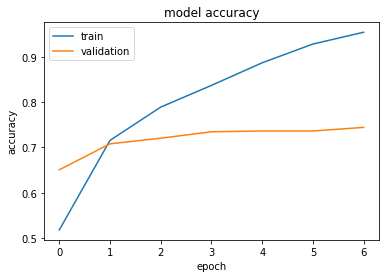

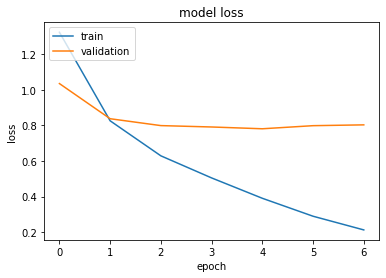

In [ ]:
# Accuracy plot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Predictions:

In [ ]:
predictions = model.predict(X_test_pad)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]
predictions

['sadness',
 'anger',
 'anger',
 'fear',
 'anger',
 'neutral',
 'anger',
 'anger',
 'neutral',
 'anger',
 'neutral',
 'neutral',
 'fear',
 'anger',
 'anger',
 'joy',
 'sadness',
 'neutral',
 'sadness',
 'fear',
 'joy',
 'fear',
 'joy',
 'anger',
 'neutral',
 'fear',
 'neutral',
 'joy',
 'anger',
 'anger',
 'joy',
 'neutral',
 'fear',
 'joy',
 'anger',
 'fear',
 'fear',
 'sadness',
 'sadness',
 'neutral',
 'anger',
 'sadness',
 'joy',
 'anger',
 'neutral',
 'joy',
 'anger',
 'anger',
 'neutral',
 'anger',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'fear',
 'joy',
 'anger',
 'neutral',
 'neutral',
 'anger',
 'joy',
 'fear',
 'neutral',
 'fear',
 'anger',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'joy',
 'neutral',
 'neutral',
 'joy',
 'fear',
 'anger',
 'sadness',
 'joy',
 'sadness',
 'fear',
 'sadness',
 'fear',
 'anger',
 'anger',
 'sadness',
 'joy',
 'anger',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'neutral',
 'anger',
 'fear',
 'fear',
 'anger',

In [ ]:

print("Accuracy: {:.2f}%".format(accuracy_score(data_test.Emotion, predictions) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(data_test.Emotion, predictions, average='micro') * 100))

Accuracy: 74.42%

F1 Score: 74.42


In [ ]:
# creates a HDF5 file 'my_model.h5'
model.save('models/cnn_word21vec.h5')

from keras.models import load_model
predictors = load_model('models/cnn_word21vec.h5')


### Test Phase :

In [ ]:

print('Message: {}\nPredicted: {}'.format(X_test[0], predictions[0]))

Message: I experienced this emotion when my grandfather passed away.
Predicted: sadness


In [ ]:

print('Message: {}\nPredicted: {}'.format(X_test[50], predictions[50]))

Message: Life is short, live it.  is rare, grab it. Anger is bad, dump it. is awful, face it. #Memories are sweet, cherish them.
Predicted: anger


### Test Phase : With Manual Input:

In [ ]:
import time

message = ['delivery was hour late and my pizza was cold!']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['delivery was hour late and my pizza was cold!']
predicted: neutral (0.12 seconds)


In [ ]:
import time

message = ['anger']

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

start_time = time.time()
pred = model.predict(padded)

print('Message: ' + str(message))
print('predicted: {} ({:.2f} seconds)'.format(class_names[np.argmax(pred)], (time.time() - start_time)))

Message: ['anger']
predicted: neutral (0.09 seconds)


In [ ]:
num_classes = 5

max_seq_len = 500

class_names = ['joy', 'fear', 'anger', 'sadness', 'neutral']

In [ ]:
message = ['i am happy from you!']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(message)

seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)


pred = predictor.predict(padded)







print('Message: ' + str(message))
print('predicted: {} '.format(class_names[np.argmax(pred)], ))

Message: ['i am happy from you!']
predicted: sadness 


In [ ]:
message = ['i am happy from you!']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(message)
seq = tokenizer.texts_to_sequences(message)
padded = pad_sequences(seq, maxlen=max_seq_len)

In [ ]:
predictions = predictor.predict(padded)
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[pred] for pred in predictions]
predictions

['sadness']